********************************************************************************************************************************
#  ML Lab 03 - Getting Familiar with Machine Learning Libraries
<hr/>

By: **Virendra Singh** <br>
Linkedin: https://www.linkedin.com/in/singhviren7/

<hr/>


## Lab Overview  
### Objectives

- Solve the below 10-step problem:
1. Download the 80-cereals dataset from https://www.kaggle.com/crawford/80-cereals
2. Load the dataset using pd.read_csv method.
3. a. In the column "mfr", replace the column "K" as "Kellogg's", "G" as "Nestle" and all other values as "Other Brands".
   b. In the column "type", replace "C" with "Type 1" and "H" with "Type 2".
4. Visualise the count of above two features "mfr" and "type" with a bar-plot.
5. Describe the five-number summary and boxplots of the features - protien, sugars, fat, carbo.
6. Plot Histograms for the features - fat, carbo, sodium, fiber.
7. Split the datasets into following ratios: 60:40, 70:30, 80:20. Write down what happens when you give "random_state" parameter with a constant value and what happens if you do not mention the parameter at all.
8. Apply MinMaxScaler() and StandardScaler() to the following features: calories, protien, fat, sodium, fiber, carbo, sugars.
9. Does the standard or min-max scaling make a difference in value distribution? Support your answers with some visualisations on the above dataset.
10. As an extension of 7th step, Generate a new Pandas DataFrame with the following columns based on the Training Dataset: Split Ratio | Random State | Total Number of Entries | Count of Kellogg's | Count of Nestle | Count of Other Brands.

### Problem Definition
An Analytics-based firm has chosen you to be part of their training process in Machine Learning Libraries. They have designed a 10-step problem, which will help you to familiarise the basics and pre-requisites.

### Approach
Starts with getting femalior with dataset and it's pre-requisites, importing the basic libraries. Will use various markdown options in Jupyter notebook which provide us smooth python coding in jupyter note book. Will solve sep by step using required libraries and plots.

## CODE:

In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<hr>

- Download the 80-cereals dataset from given link.
  - Link: https://www.kaggle.com/crawford/80-cereals

<hr>
 - Loading the Dataset.

In [2]:
df=pd.read_csv("cereal.csv")

In [3]:
df.head() #Chacking first five rows.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
print("Shape of Dataset:")
print("Number of Features:",df.shape[0])
print("Number of Observations:",df.shape[1])

Shape of Dataset:
Number of Features: 77
Number of Observations: 16


<hr>

- In the column "mfr", replace the column "K" as "Kellogg's", "G" as "Nestle" and all other values as "Other Brands".

In [5]:
# Creating a function for each given replacement.
def mfr_change(x):
    if(x=="K"):
        return("Kellogg's")
    elif(x=="G"):
        return("Nastle")
    else:
        return("Othder Brands")

In [6]:
# Applying the function in "mfr" column.
df.mfr=df.mfr.apply(mfr_change)

In [7]:
# Checking...
df.mfr.value_counts()

Othder Brands    32
Kellogg's        23
Nastle           22
Name: mfr, dtype: int64

- In the column "type", replace "C" with "Type 1" and "H" with "Type 2".

In [8]:
df.type.value_counts() #Given values.

C    74
H     3
Name: type, dtype: int64

In [9]:
#Creating the function to change the values.
def type_change(x):
    if(x=="C"):
        return("Type 1")
    elif(x=="H"):
        return("Type 2")

In [10]:
# Applying the function in the column.
df["type"]=df["type"].apply(type_change)

In [11]:
df.type.value_counts() # After the change.

Type 1    74
Type 2     3
Name: type, dtype: int64

<hr>

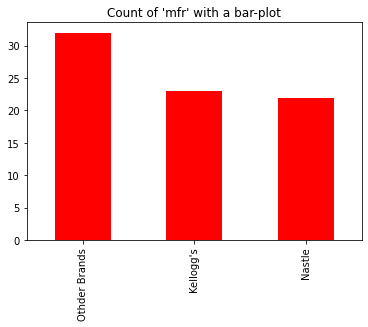

In [12]:
# Plotting the count of "mfr".
mfr_c=df.mfr.value_counts()
mfr_c.plot(kind="bar",color="red")
plt.title("Count of 'mfr' with a bar-plot")
plt.show()

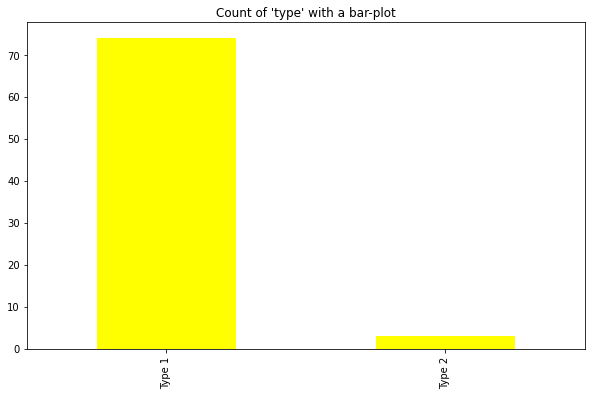

In [13]:
# Plotting the count of "type".
plt.figure(figsize=(10,6))
df.type.value_counts().plot(kind="bar", color="yellow")
plt.title("Count of 'type' with a bar-plot")
plt.show()

<hr>

#### Five number summary:
` A five-number summary is especially useful in descriptive analyses or during the preliminary investigation of a large data set.`
- This makes the five-number summary a useful measure of spread. A summary consists of five values: 
  - the most extreme values in the data set (the maximum and minimum values), 
  - the lower and upper quartiles, and the median. 
  - These values are presented together and ordered from lowest to highest: minimum value. 
  - lower quartile (Q1), median value (Q2), upper quartile (Q3), maximum value.

In [14]:
# Showing the Five number Summry.
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [15]:
Protein=df["protein"]
Sugar=df["sugars"]
Carbo=df["carbo"]
Fat=df["fat"]

data_b=[Protein,Sugar,Carbo,Fat]

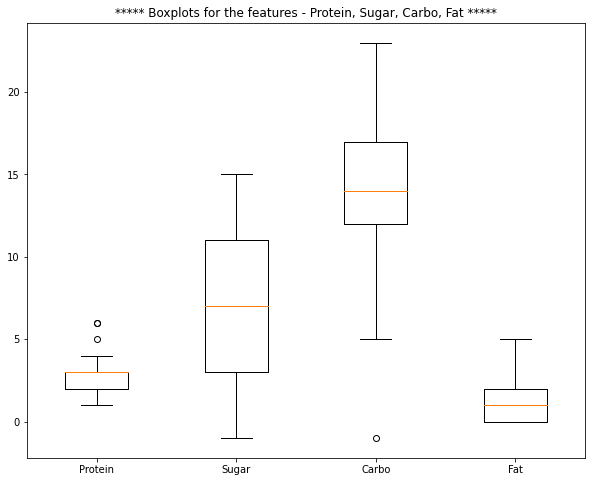

In [16]:
# Drawing the Boxplot for the features - Protein,Sugar,Carbo,Fat.
plt.figure(figsize=(10,8))
plt.boxplot(data_b, labels=['Protein','Sugar','Carbo','Fat'])
plt.title("***** Boxplots for the features - Protein, Sugar, Carbo, Fat *****")
plt.show()

<hr>


In [17]:
# assigning the variable in single list to draw the plot.
a=df["protein"]
b=df["carbo"]
c=df["sodium"]
d=df["fiber"]
data_b=[a,b,c,d]

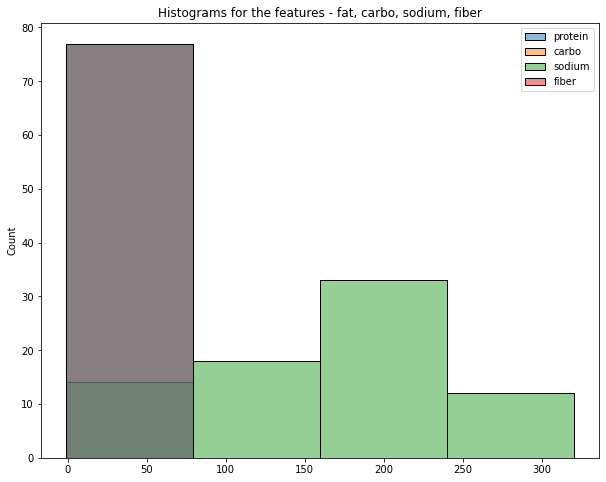

In [18]:
# Plotting Histograms for the features - fat, carbo, sodium, fiber.
plt.figure(figsize=(10,8))
sns.histplot(data = data_b, bins=4)
plt.title("Histograms for the features - fat, carbo, sodium, fiber")
plt.show()

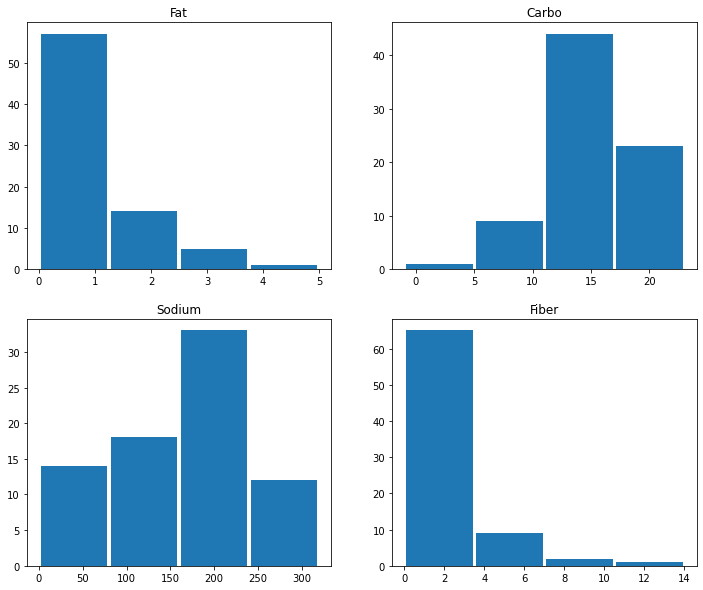

In [19]:
# Plotting Histograms for the features - fat, carbo, sodium, fiber using Matplotlib.

plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
plt.hist(df['fat'],bins=4,rwidth=0.95)
plt.title("Fat")

plt.subplot(2, 2, 2)
plt.hist(df['carbo'],bins=4,rwidth=0.95)
plt.title("Carbo")

plt.subplot(2, 2, 3)
plt.hist(df['sodium'],bins=4,rwidth=0.95)
plt.title("Sodium")

plt.subplot(2, 2, 4)
plt.hist(df['fiber'],bins=4,rwidth=0.95)
plt.title("Fiber")

plt.show()

<hr>

In [20]:
df.head(2) 

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Othder Brands,Type 1,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Othder Brands,Type 1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


In [21]:
#Defining the "rating as target variable and others as independent variable."
y=df["rating"]
X=df.drop(["rating"],axis=1)

In [22]:
# Importing the librarie.
from sklearn.model_selection import train_test_split

In [23]:
#Splitting in 60:40 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 123)

In [24]:
#Splitting in 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [25]:
#Splitting in 80:20 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Random State
- Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. 
- The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.
- When the Random_state is not defined in the code for every run train data will change and accuracy might change for every run. - When the Random_state = "any constant integer" is defined then train data will be constant For every run so that it will make easy to debug.

<hr>

In [26]:
# making copy of data set so we can compare the each scalers easly.
df2=df.copy()
df3=df.copy()

#### MinMaxScaler() and StandardScaler() 
`In this method, we convert variables with different scales of measurements into a single scale. `
- **StandardScaler** normalizes the data using the formula (x-mean)/standard deviation.
- **MinMaxScaler** normalizes the data using the formula (x - min)/(max - min).

In [27]:
# importing the MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale

MinMaxScaler()

In [28]:
# importing the StandardScaler.
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [29]:
# transforming data using MinMaxScaler().
df2['calories'] = minmax_scale.fit_transform(df2[["calories"]])
df2['protein'] = minmax_scale.fit_transform(df2[["protein"]])
df2['fat'] = minmax_scale.fit_transform(df2[["fat"]])
df2['sodium'] = minmax_scale.fit_transform(df2[["sodium"]])
df2['fiber'] = minmax_scale.fit_transform(df2[["fiber"]])
df2['carbo'] = minmax_scale.fit_transform(df2[["carbo"]])
df2['sugars'] = minmax_scale.fit_transform(df2[["sugars"]])

In [30]:
df2.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Othder Brands,Type 1,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Othder Brands,Type 1,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kellogg's,Type 1,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,320,25,3,1.0,0.33,59.425505


In [31]:
# # transforming data using StanderdScaler().
df3['calories'] = std_scale.fit_transform(df3[['calories']])
df3['protein'] = std_scale.fit_transform(df3[["protein"]])
df3['fat'] = std_scale.fit_transform(df3[["fat"]])
df3['sodium'] = std_scale.fit_transform(df3[["sodium"]])
df3['fiber'] = std_scale.fit_transform(df3[["fiber"]])
df3['carbo'] = std_scale.fit_transform(df3[["carbo"]])
df3['sugars'] = std_scale.fit_transform(df3[["sugars"]])

In [32]:
df3.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Othder Brands,Type 1,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.257639,-0.208807,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Othder Brands,Type 1,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.551936,0.244099,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kellogg's,Type 1,-1.905397,1.337319,-0.012988,1.204578,2.892113,-1.787170,-0.435260,320,25,3,1.0,0.33,59.425505


<hr>

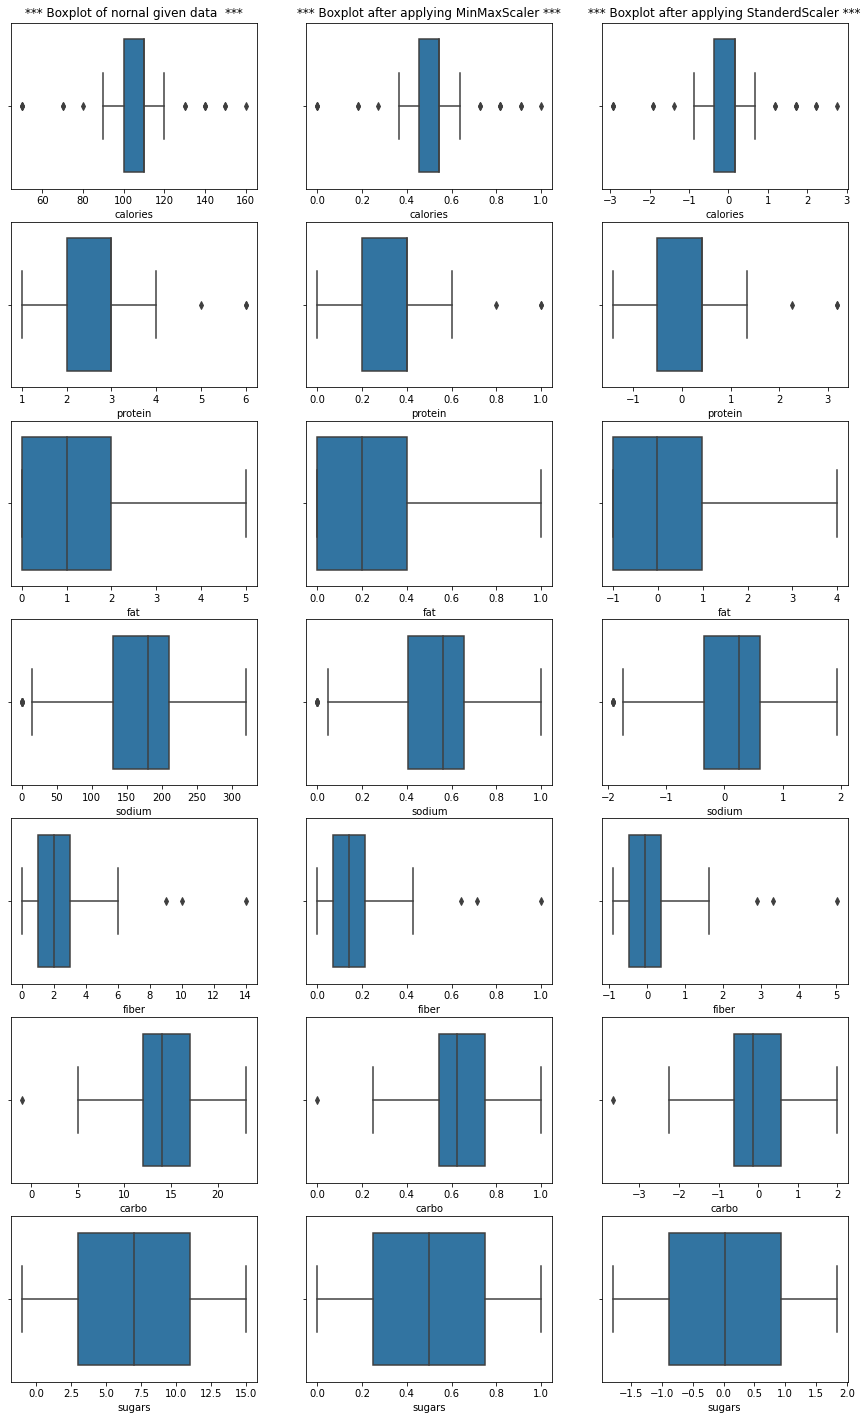

In [33]:
# Plotting boxplots of given variables(calories, protien, fat, sodium, fiber, carbo, sugars) to compare the both normalizations.
plt.figure(figsize=(15,25))

plt.subplot(7, 3, 1)
sns.boxplot(df['calories'])
plt.title("*** Boxplot of nornal given data  ***")
plt.subplot(7, 3, 2)
sns.boxplot(df2['calories'])
plt.title("*** Boxplot after applying MinMaxScaler ***")  
plt.subplot(7, 3, 3)
sns.boxplot(df3['calories'])
plt.title("*** Boxplot after applying StanderdScaler ***")             
                                    
plt.subplot(7, 3, 4)
sns.boxplot(df['protein'])
plt.subplot(7, 3, 5)
sns.boxplot(df2['protein'])
plt.subplot(7, 3, 6)
sns.boxplot(df3['protein'])

plt.subplot(7, 3, 7)
sns.boxplot(df['fat'])
plt.subplot(7, 3, 8)
sns.boxplot(df2['fat'])
plt.subplot(7, 3, 9)
sns.boxplot(df3['fat'])


plt.subplot(7, 3, 10)
sns.boxplot(df['sodium'])
plt.subplot(7, 3, 11)
sns.boxplot(df2['sodium'])
plt.subplot(7, 3, 12)
sns.boxplot(df3['sodium'])

plt.subplot(7, 3, 13)
sns.boxplot(df['fiber'])
plt.subplot(7, 3, 14)
sns.boxplot(df2['fiber'])
plt.subplot(7, 3, 15)
sns.boxplot(df3['fiber'])

plt.subplot(7, 3, 16)
sns.boxplot(df['carbo'])
plt.subplot(7, 3, 17)
sns.boxplot(df2['carbo'])
plt.subplot(7, 3, 18)
sns.boxplot(df3['carbo'])

plt.subplot(7, 3, 19)
sns.boxplot(df['sugars'])
plt.subplot(7, 3, 20)
sns.boxplot(df2['sugars'])
plt.subplot(7, 3, 21)
sns.boxplot(df3['sugars'])

plt.show()

<hr>

In [34]:
#Assigning the variables for each splits.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.4, random_state = 123)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 456)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2)

In [35]:
# Assigning the required data.
k1=(X_train1["mfr"]=="Kellogg's").value_counts()[1]
n1=(X_train1["mfr"]=="Nastle").value_counts()[1]
o1=(X_train1["mfr"]=="Othder Brands").value_counts()[1]

k2=(X_train2["mfr"]=="Kellogg's").value_counts()[1]
n2=(X_train2["mfr"]=="Nastle").value_counts()[1]
o2=(X_train2["mfr"]=="Othder Brands").value_counts()[1]

k3=(X_train3["mfr"]=="Kellogg's").value_counts()[1]
n3=(X_train3["mfr"]=="Nastle").value_counts()[1]
o3=(X_train3["mfr"]=="Othder Brands").value_counts()[1]

In [36]:
# Generating the DataFrame.
data = pd.DataFrame(columns = ["Split Ratio", "Random State", "Total Number of Entries","Count of Kellogg's",
                               "Count of Nestle","Count of Other Brands"])

In [37]:
# Assigning the value for each splits and appending the values.

data_1 = {"Split Ratio":"60:40", 
          "Random State":123, 
          "Total Number of Entries":(X_train1.shape[0]),
          "Count of Kellogg's":k1,
          "Count of Nestle":n1,
          "Count of Other Brands":o1}
data = data.append(data_1, ignore_index=True)

data_2 = {"Split Ratio":"70:20", 
          "Random State":456, 
          "Total Number of Entries":(X_train2.shape[0]),
          "Count of Kellogg's":k2,
          "Count of Nestle":n2,
          "Count of Other Brands":o2}
data = data.append(data_2, ignore_index=True)

data_3 = {"Split Ratio":"80:20",
          "Total Number of Entries":(X_train3.shape[0]),
          "Count of Kellogg's":k3,
          "Count of Nestle":n3,
          "Count of Other Brands":o3}
data = data.append(data_3, ignore_index=True)

In [38]:
# Final generated DataFrame.
data

,Split Ratio,Random State,Total Number of Entries,Count of Kellogg's,Count of Nestle,Count of Other Brands
0,60:40,123,46,15,13,18
1,70:20,456,53,18,11,24
2,80:20,NaN,61,21,16,24


# References
-  https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python
-  https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
-  https://www.javatpoint.com/pandas-dataframe-describe, https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/, https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
-  https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python, https://www.geeksforgeeks.org/how-to-make-histograms-with-density-plots-with-seaborn-histplot/
-  https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

## Conclusion/Results
This assignment given us the basic idea about the DataFrame, Visulization, ML/Analysis, libraries, datasets and various subparts of sklearn libraries, it's uses and different parameter matrices.
*******************************************************************************************************************************
